# Proyek Analisis Data: Bike Sharing
- Kelompok : Turtle
- Anggota : </br>
10122115 - Noval Kurnia Wicaksono </br>
10122102 - Muhammad Hafiz Akbar </br>
10122080 - Gilang Rifaldi </br>
10122087 - Rama Hadi Nugraha </br>
10122107 - M. Fajar Fadhila </br>
10122098 - Rizki Lugina

## Menentukan Pertanyaan Bisnis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
day_data = pd.read_csv('/content/drive/MyDrive/day.csv')
hour_data = pd.read_csv('/content/drive/MyDrive/hour.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Pertanyaan 1: Bagaimana perbandingan tren peminjaman sepeda antara tahun 2011 dan 2012? Apakah terjadi peningkatan atau penurunan? dan pada musim manakah peningkatan peminjaman paling tinggi? - 10122115 - Noval Kurnia Wicaksono
- Pertanyaan 2: Apakah ada perbedaan antara hari kerja (workingday) dan hari libur (holiday) dalam jumlah sewa sepeda harian? dan pada bulan berapa
 permintaan sewa sepeda paling tinggi? - 10122102 - Muhammad Hafiz Akbar
- Pertanyaan 3 : Bagaimana data perbandingan peminjaman sepeda dengan kondisi cuaca yang berbeda? Apakah saat hujan, permintaan peminjaman akan menurun? - 10122087 - Rama Hadi Nugraha
- Pertanyaan 4: Apakah ada waktu tertentu yang menunjukkan puncak permintaan sewa sepeda? Pada jam berapa permintaan sewa sepeda paling tinggi? - 10122098 - Rizki Lugina
- Pertanyaan 5: Bagaimana distribusi sepeda yang disewakan berdasarkan kategori pengguna, yaitu pelanggan register atau pelanggan kasual? Apakah ada perbedaan karakteristik atau preferensi antara kedua kelompok pengguna tersebut? - 10122107 - M. Fajar Fadhila
- Pertanyaan 6: Bagaimana pengaruh suhu, kelembaban, dan kecepatan angin terhadap jumlah sepeda yang disewakan? - 10122080 - Gilang Rifaldi

## Menyiapkan semua library yang dibutuhkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data
 - Ini adalah tahap di mana data yang diperlukan untuk analisis dikumpulkan dari berbagai sumber.
 - Identifikasi sumber data yang diperlukan untuk proyek atau analisis.

In [ ]:
print('Day Data Head:')
print(day_data.head(),"\n")
print("Hour Data head :")
print(hour_data.head())

Day Data Head:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600   

Hour Data

### Assessing Data

- Evaluasi awal terhadap data untuk memahami kualitas dan karakteristiknya.
- Mengidentifikasi potensi masalah atau kekurangan dalam data.

In [ ]:

print("### Missing Values ###")
print("Data Harian:")
print(day_data.isnull().sum())
print("\nData Per Jam:")
print(hour_data.isnull().sum())
print("\n")

# Cek Duplikat
print("### Duplikat ###")
print("Data Harian:")
print(day_data.duplicated().sum())
print("\nData Per Jam:")
print(hour_data.duplicated().sum())
print("\n")

# Cek Tipe Data
print("### Tipe Data ###")
print("Data Harian:")
print(day_data.dtypes)
print("\nData Per Jam:")
print(hour_data.dtypes)

### Missing Values ###
Data Harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data Per Jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Duplikat ###
Data Harian:
0

Data Per Jam:
0


### Tipe Data ###
Data Harian:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
reg

### Cleaning Data
- Mengidentifikasi dan menangani nilai-nilai yang hilang atau tidak valid.
- Mengatasi duplikasi data.
- Menangani outlier atau data ekstrem yang tidak wajar.

**Data yang diberikan sudah clean dan tidak ada missing values maupun
duplikasi data.**

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
def print_data_info(data_name, data_info):
    print(f"{data_name} Data:")
    for col, desc in data_info.items():
        print(f"{col}: {desc}")

# Print informasi Data Harian
print("### Data Harian (Day Data):")
day_data_info = {
    'instant': 'Indeks atau pengenal untuk setiap catatan.',
    'dteday': 'Tanggal titik data.',
    'season': 'Musim (1:musim semi, 2:panas, 3:gugur, 4:dingin).',
    'yr': 'Tahun (0: 2011, 1:2012).',
    'mnth': 'Bulan (1 hingga 12).',
    'holiday': 'Indikator biner apakah itu hari libur atau tidak.',
    'weekday': 'Hari dalam seminggu (0 hingga 6).',
    'workingday': 'Indikator biner apakah itu hari kerja atau tidak.',
    'weathersit': 'Situasi cuaca (1: Cerah, 2: Kabut, 3: Hujan/Salju Ringan, 4: Hujan/Salju Berat).',
    'temp': 'Suhu ternormalisasi.',
    'atemp': 'Suhu terasa ternormalisasi.',
    'hum': 'Kelembaban ternormalisasi.',
    'windspeed': 'Kecepatan angin ternormalisasi.',
    'casual': 'Jumlah penyewaan sepeda kasual.',
    'registered': 'Jumlah penyewaan sepeda terdaftar.',
    'cnt': 'Total jumlah penyewaan sepeda (casual + terdaftar).'
}

print_data_info("Day", day_data_info)
print("\n")

# Print informasi Data Per Jam
print("### Data Per Jam (Hour Data):")
hour_data_info = {
    'instant': 'Indeks atau pengenal untuk setiap catatan.',
    'dteday': 'Tanggal titik data.',
    'season': 'Musim (1:musim semi, 2:panas, 3:gugur, 4:dingin).',
    'yr': 'Tahun (0: 2011, 1:2012).',
    'mnth': 'Bulan (1 hingga 12).',
    'hr': 'Jam dalam sehari.',
    'holiday': 'Indikator biner apakah itu hari libur atau tidak.',
    'weekday': 'Hari dalam seminggu (0 hingga 6).',
    'workingday': 'Indikator biner apakah itu hari kerja atau tidak.',
    'weathersit': 'Situasi cuaca (1: Cerah, 2: Kabut, 3: Hujan/Salju Ringan, 4: Hujan/Salju Berat).',
    'temp': 'Suhu.',
    'atemp': 'Suhu terasa.',
    'hum': 'Kelembaban.',
    'windspeed': 'Kecepatan angin.',
    'casual': 'Jumlah penyewaan sepeda kasual.',
    'registered': 'Jumlah penyewaan sepeda terdaftar.',
    'cnt': 'Total jumlah penyewaan sepeda (casual + terdaftar).'
}

print_data_info("Hour", hour_data_info)
print ("\n"'Cek missing values')
day_data.isnull().sum()
hour_data.isnull().sum()


### Data Harian (Day Data):
Day Data:
instant: Indeks atau pengenal untuk setiap catatan.
dteday: Tanggal titik data.
season: Musim (1:musim semi, 2:panas, 3:gugur, 4:dingin).
yr: Tahun (0: 2011, 1:2012).
mnth: Bulan (1 hingga 12).
holiday: Indikator biner apakah itu hari libur atau tidak.
weekday: Hari dalam seminggu (0 hingga 6).
workingday: Indikator biner apakah itu hari kerja atau tidak.
weathersit: Situasi cuaca (1: Cerah, 2: Kabut, 3: Hujan/Salju Ringan, 4: Hujan/Salju Berat).
temp: Suhu ternormalisasi.
atemp: Suhu terasa ternormalisasi.
hum: Kelembaban ternormalisasi.
windspeed: Kecepatan angin ternormalisasi.
casual: Jumlah penyewaan sepeda kasual.
registered: Jumlah penyewaan sepeda terdaftar.
cnt: Total jumlah penyewaan sepeda (casual + terdaftar).


### Data Per Jam (Hour Data):
Hour Data:
instant: Indeks atau pengenal untuk setiap catatan.
dteday: Tanggal titik data.
season: Musim (1:musim semi, 2:panas, 3:gugur, 4:dingin).
yr: Tahun (0: 2011, 1:2012).
mnth: Bulan (1 hingg

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan tren peminjaman sepeda antara tahun 2011 dan 2012? Apakah terjadi peningkatan atau penurunan? dan pada musim manakah peningkatan peminjaman paling tinggi? - 10122115 - Noval Kurnia Wicaksono

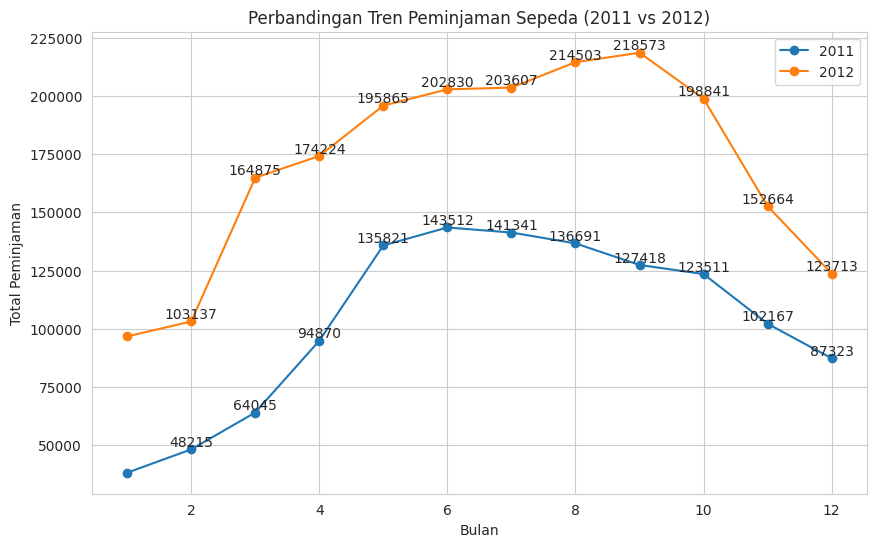

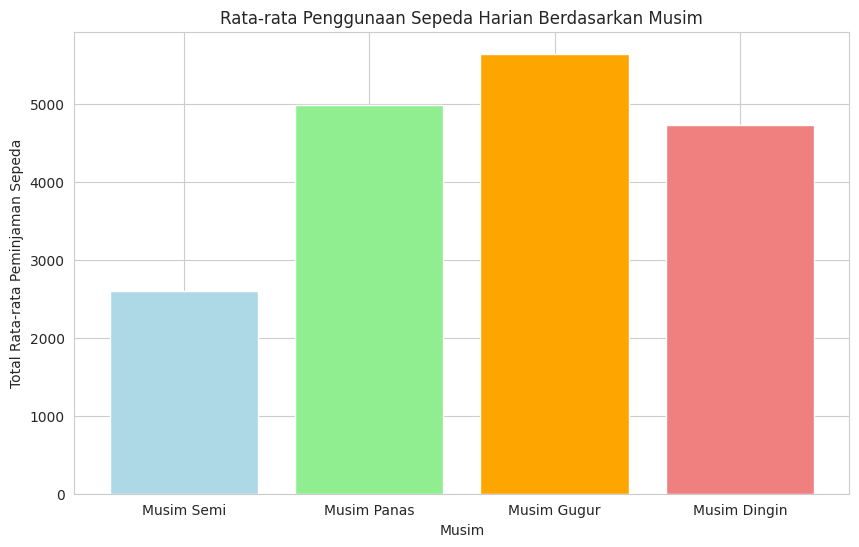

In [ ]:
data_2011 = day_data[day_data['yr'] == 0]
data_2012 = day_data[day_data['yr'] == 1]

# Menghitung total peminjaman per bulan untuk setiap tahun
total_2011 = data_2011.groupby('mnth')['cnt'].sum().reset_index()
total_2012 = data_2012.groupby('mnth')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(total_2011['mnth'], total_2011['cnt'], label='2011', marker='o')
plt.plot(total_2012['mnth'], total_2012['cnt'], label='2012', marker='o')

plt.title('Perbandingan Tren Peminjaman Sepeda (2011 vs 2012)')
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman')

# Menambahkan label jumlah hasil terkini di masing-masing perubahan
for i in range(1, len(total_2011)):
    plt.text(total_2011['mnth'][i], total_2011['cnt'][i], f'{total_2011["cnt"][i]:.0f}', ha='center', va='bottom')

for i in range(1, len(total_2012)):
    plt.text(total_2012['mnth'][i], total_2012['cnt'][i], f'{total_2012["cnt"][i]:.0f}', ha='center', va='bottom')

plt.legend()
plt.show()

######
plt.figure(figsize=(10, 6))
avg_daily_cnt = day_data.groupby('season')['cnt'].mean()

# Membuat plot
plt.bar(avg_daily_cnt.index, avg_daily_cnt.values, color=['lightblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title('Rata-rata Penggunaan Sepeda Harian Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Rata-rata Peminjaman Sepeda')
plt.xticks(avg_daily_cnt.index, ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

### Pertanyaan 2:  Apakah ada perbedaan antara hari kerja (workingday) dan hari libur (holiday) dalam jumlah sewa sepeda harian? dan pada bulan berapa permintaan sewa sepeda paling tinggi? - 10122102 - Muhammad Hafiz Akbar



Menggabungkan data dalam beberapa dataframe.

Pada pertanyaan ini ada 2 dataframe yang akan digunakan yaitu,day dan hour. keduanya memiliki tabel yang sama tetapi satuan yang berbeda.

In [ ]:
bike_sharing = day_data.merge(hour_data, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
print(bike_sharing.shape)

bike_sharing.loc[bike_sharing["dteday"].isnull()]
bike_sharing.head()

(17379, 32)


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


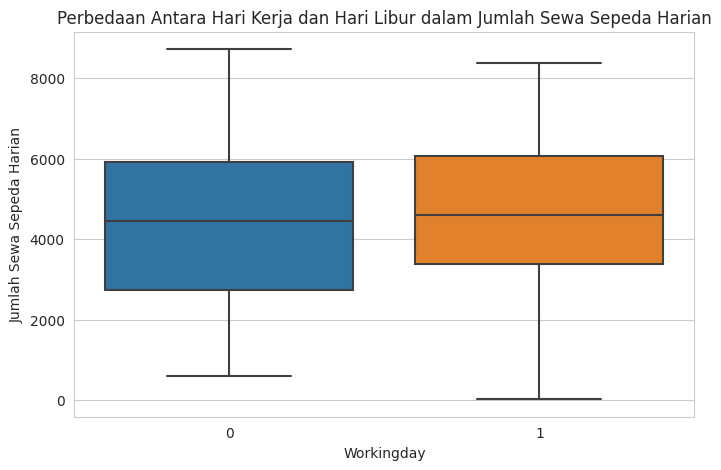

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="workingday_daily", y="cnt_daily", data=bike_sharing)
plt.title("Perbedaan Antara Hari Kerja dan Hari Libur dalam Jumlah Sewa Sepeda Harian")
plt.xlabel("Workingday")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

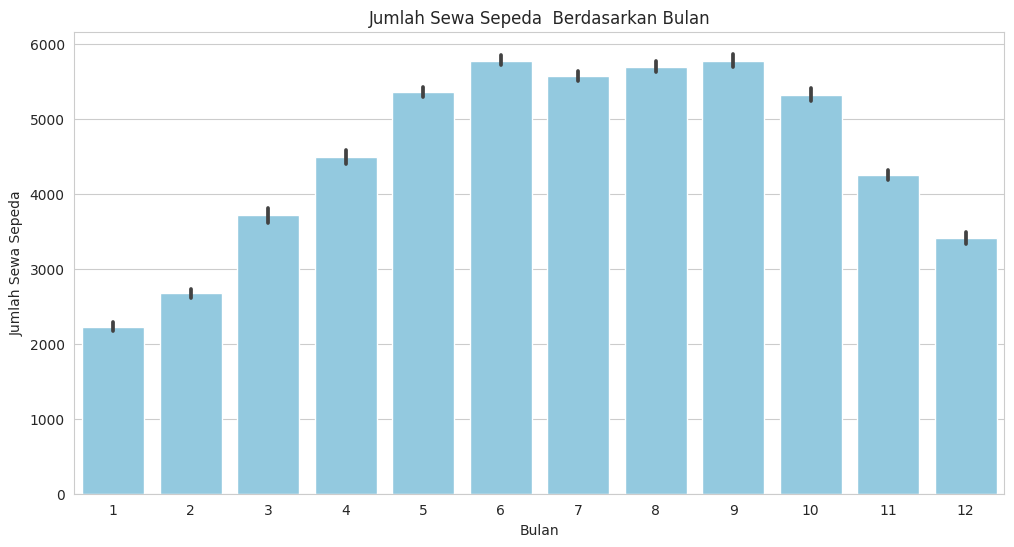

In [ ]:
# Pola jumlah sewa sepeda berdasarkan bulan
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(x='mnth_daily', y='cnt_daily', data=bike_sharing, color='skyblue')
plt.title("Jumlah Sewa Sepeda  Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda")
plt.show()

### Pertanyaan 3: Bagaimana data perbandingan peminjaman sepeda dengan kondisi cuaca yang berbeda? Apakah saat hujan, permintaan peminjaman akan menurun? - 10122087 - Rama Hadi Nugraha

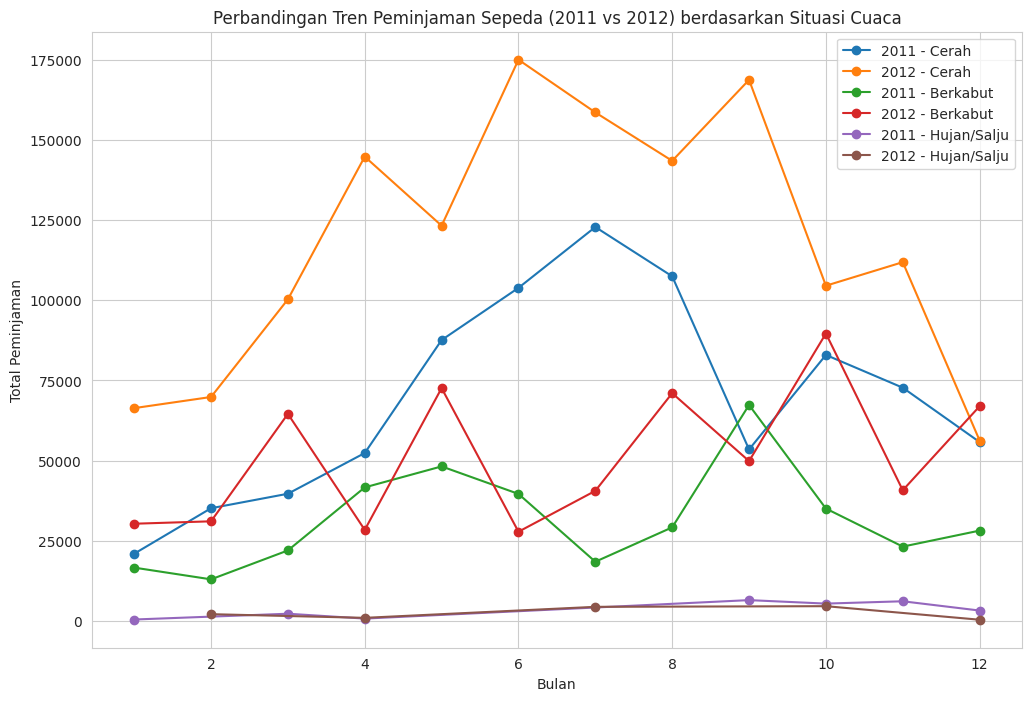

In [ ]:
data_2011 = day_data[day_data['yr'] == 0]
data_2012 = day_data[day_data['yr'] == 1]

total_2011 = data_2011.groupby(['mnth', 'weathersit'])['cnt'].sum().reset_index()
total_2012 = data_2012.groupby(['mnth', 'weathersit'])['cnt'].sum().reset_index()

unique_weathersit = total_2011['weathersit'].unique()

plt.figure(figsize=(12, 8))

weather_labels = ['Cerah', 'Berkabut', 'Hujan/Salju', 'Badai']

for weathersit in unique_weathersit:
    subset_2011 = total_2011[total_2011['weathersit'] == weathersit]
    subset_2012 = total_2012[total_2012['weathersit'] == weathersit]

    plt.plot(subset_2011['mnth'], subset_2011['cnt'], label=f'2011 - {weather_labels[weathersit-1]}', marker='o')
    plt.plot(subset_2012['mnth'], subset_2012['cnt'], label=f'2012 - {weather_labels[weathersit-1]}', marker='o')

plt.title('Perbandingan Tren Peminjaman Sepeda (2011 vs 2012) berdasarkan Situasi Cuaca')
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman')
plt.legend()
plt.show()

### Pertanyaan 4: Apakah ada waktu tertentu yang menunjukkan puncak permintaan sewa sepeda? Pada jam berapa permintaan sewa sepeda paling tinggi? - 10122098 - Rizki Lugina

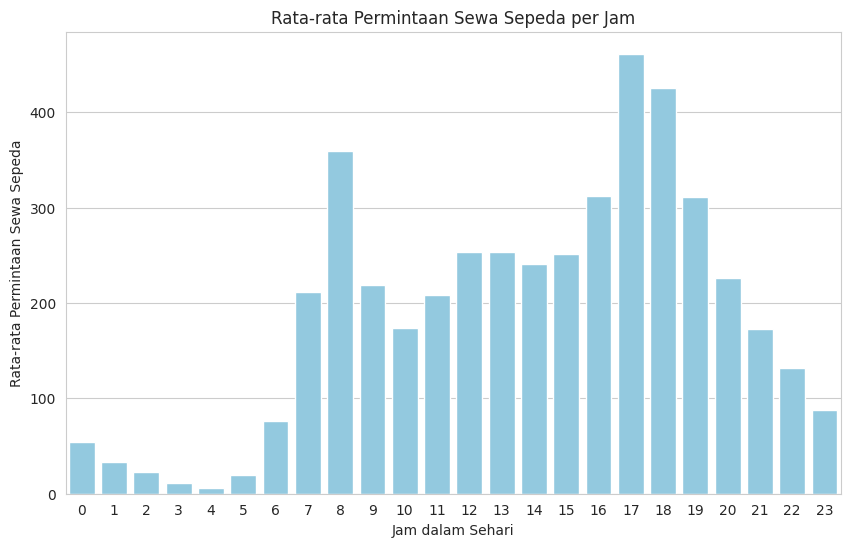

In [ ]:
# Mengelompokkan data per jam dan menghitung total peminjaman
hourly_demand = hour_data.groupby('hr')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt', data=hourly_demand, color='skyblue')
plt.title('Rata-rata Permintaan Sewa Sepeda per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Permintaan Sewa Sepeda')
plt.show()


In [ ]:
# Jam dengan permintaan tertinggi
jam_tertinggi = hourly_demand[hourly_demand['cnt'] == hourly_demand['cnt'].max()]

print("Jam dengan Permintaan Tertinggi:")
print(jam_tertinggi)

Jam dengan Permintaan Tertinggi:
    hr         cnt
17  17  461.452055


### Pertanyaan 5: Bagaimana distribusi sepeda yang disewakan berdasarkan kategori pengguna, yaitu pelanggan register atau pelanggan kasual? Apakah ada perbedaan karakteristik atau preferensi antara kedua kelompok pengguna tersebut? - 10122107 - M. Fajar Fadhila

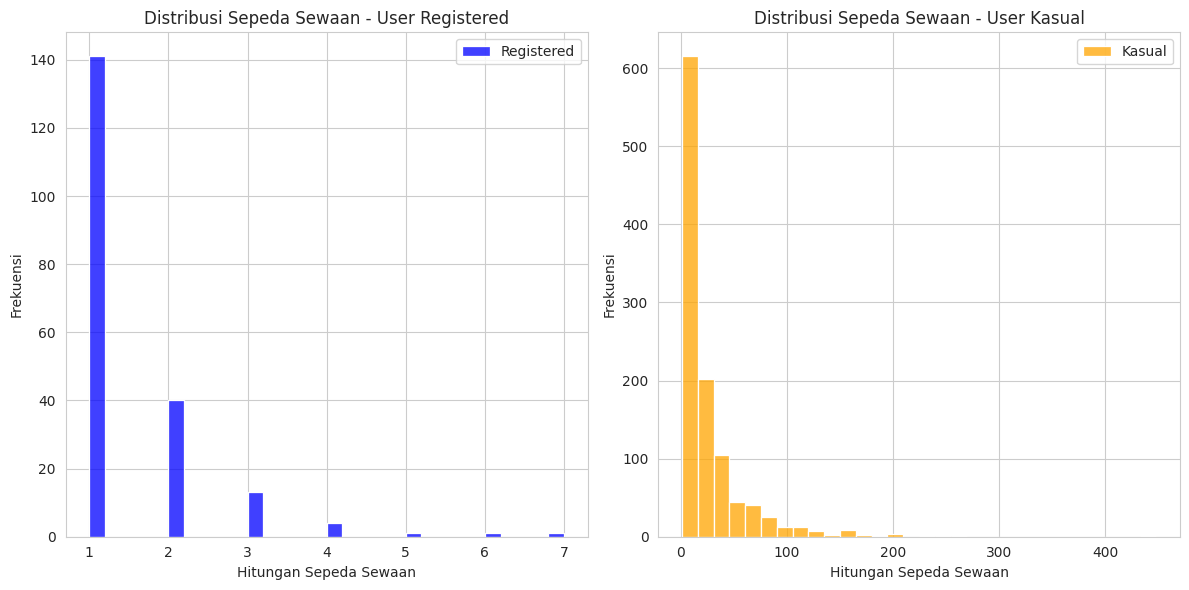

In [ ]:
# Memisahkan data berdasarkan jenis pengguna
data_registered = hour_data[hour_data['registered'] == 1]
data_casual = hour_data[hour_data['casual'] == 1]

# Visualisasi distribusi sepeda yang disewakan
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_registered['cnt'], bins=30, kde=False, color='blue', label='Registered')
plt.title('Distribusi Sepeda Sewaan - User Registered')
plt.xlabel('Hitungan Sepeda Sewaan')
plt.ylabel('Frekuensi')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data_casual['cnt'], bins=30, kde=False, color='orange', label='Kasual')
plt.title('Distribusi Sepeda Sewaan - User Kasual')
plt.xlabel('Hitungan Sepeda Sewaan')
plt.ylabel('Frekuensi')
plt.legend()

plt.tight_layout()
plt.show()

### Pertanyaan 6: Bagaimana pengaruh suhu, kelembaban, dan kecepatan angin terhadap jumlah sepeda yang disewakan? - 10122080 - Gilang Rifaldi

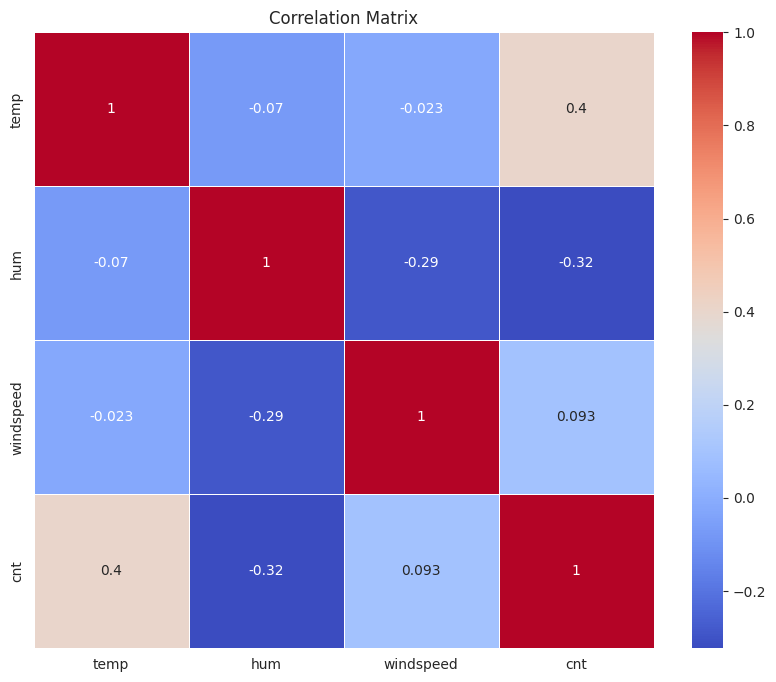

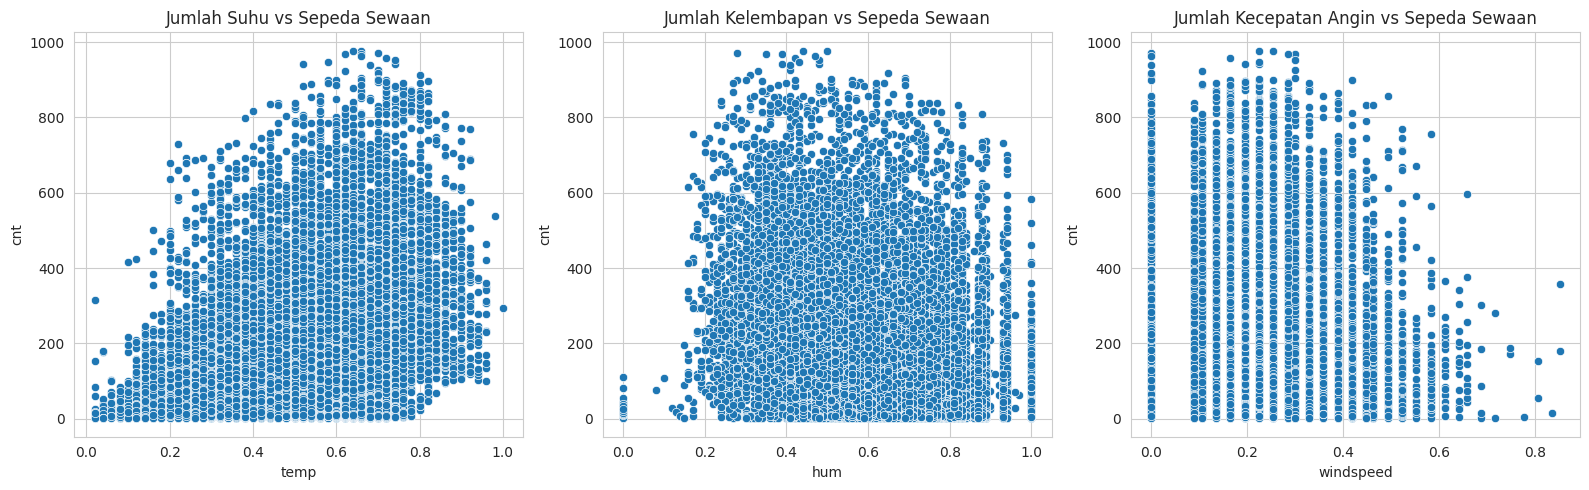

In [ ]:
# Menghitung korelasi
correlation_matrix = hour_data[['temp', 'hum', 'windspeed', 'cnt']].corr()

# Visualisasi heatmap untuk korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Visualisasi scatter plot untuk suhu, kelembaban, kecepatan angin, dan jumlah sepeda yang disewakan
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='cnt', data=hour_data)
plt.title('Jumlah Suhu vs Sepeda Sewaan')

plt.subplot(1, 3, 2)
sns.scatterplot(x='hum', y='cnt', data=hour_data)
plt.title('Jumlah Kelembapan vs Sepeda Sewaan')

plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed', y='cnt', data=hour_data)
plt.title('Jumlah Kecepatan Angin vs Sepeda Sewaan')

plt.tight_layout()
plt.show()

## Conclusion

Conclusi pertanyaan 1


- Data mengalami kenaikan di tahun 2012 hingga menyentuh ke angka tertinggi 218573 sepeda dan itu menunjukkan perubahan yang sangat signifikan berbanding dengan tahun 2011 yang hanya  143512 sepeda
- Musim Terbanyak melakukan peminjaman sepeda terjadi pada musim gugur.

Conclusi pertanyaan 2

- Jumlah sewa sepeda pada hari kerja lebih banyak daripada ketika hari libur.
- Berdasarkan bulan jumlah sewa sepeda paling tinggi di bulan 6 dan 9.

Conclusi pertanyaan 3

- Permintaan peminjaman sepeda hampir sama pada saat cerah dan berkabut. Hari-hari hujan dan bersalju menunjukkan jumlah pinjam rata-rata yang jauh lebih rendah
-  Data menunjukkan bahwa pengguna mungkin lebih cenderung untuk mengurangi aktivitas peminjaman sepeda saat kondisi cuaca buruk, seperti hujan. Ini disebabkan oleh ketidaknyamanan fisik saat berkendara sepeda saat hujan, keamanan yang lebih rendah, atau preferensi pengguna yang berubah pada kondisi cuaca tertentu.
-  Informasi ini memiliki keuntungan bisnis yang penting bagi penyedia layanan sepeda. Mengetahui bahwa peminjaman sepeda dapat dipengaruhi oleh kondisi cuaca memungkinkan penyedia untuk merencanakan penyesuaian harga berdasarkan prakiraan cuaca.

Conclusi Pertanyaan 4

-  puncak permintaan sewa sepeda terjadi sekitar pukul 16.00 hingga 17.00 sore
-  tingkat sewa sepeda tertinggi dalam sehari berada pada pukul 17 sore dengan rata-rata jumlah sebanyak 461 permintaan sewa

Conclusi Pertanyaan 5

-  Distribusi sepeda yang disewakan oleh pelanggan terdaftar dan kasual dapat dibedakan melalui visualisasi histogram atau grafik yang memperlihatkan frekuensi jumlah sepeda yang disewakan.
-  Pelanggan terdaftar mungkin memiliki pola sewa yang lebih teratur atau terprediksi dibandingkan dengan pelanggan kasual.

Conclusi Pertanyaan 6

- Jika terdapat korelasi positif antara suhu dan jumlah sepeda yang disewakan, hal ini dapat menunjukkan bahwa cuaca yang lebih hangat berkontribusi pada peningkatan permintaan sepeda.
-  Korelasi negatif dengan kelembaban atau kecepatan angin mungkin menunjukkan bahwa kondisi cuaca yang buruk dapat mengurangi minat pengguna untuk menyewa sepeda.
-  Penting untuk diingat bahwa korelasi tidak selalu menunjukkan kausalitas, dan faktor lain juga dapat berperan dalam hubungan ini.